# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [33]:
import pandas as pd
import numpy as np


# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [6]:
employee = pd.read_csv("/Users/ana/ironhack_coding/Module 2/Week 4/lab-pivot-table-and-correlation/your_code/data/Employee.csv")

In [8]:
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [9]:
# with pivot table

employee.pivot_table(index = "Department", aggfunc ="mean").head()


,Salary,Years
Department,,
HR,45.00,4.666667
IT,48.75,4.500000
Sales,55.00,2.500000


In [12]:
employee.groupby("Department").agg({"Salary":"mean"})


,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [23]:
# your answer here
employee.pivot_table(index="Department", values =["Salary"], columns=["Title"],aggfunc = "mean", fill_value = 0)

Salary                  
Title          VP analyst associate
Department                         
HR             70    32.5         0
IT             70    32.5        60
Sales           0     0.0        55

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [24]:
employee.pivot_table(index ="Title", columns = "Years", values = "Salary")

Years,1,2,3,4,7,8
Title,,,,,,
VP,NaN,NaN,NaN,NaN,NaN,70.0
analyst,35.0,30.0,NaN,35.0,NaN,NaN
associate,NaN,55.0,55.0,NaN,60.0,NaN


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [53]:
employee.pivot_table(index = "Department", columns= ["Title"], values = ["Salary","Name"], 
                     aggfunc ={ "Salary": np.mean,
                              "Name": "count"}
                    )

Name                   Salary                  
Title        VP analyst associate     VP analyst associate
Department                                                
HR          1.0     2.0       NaN   70.0    32.5       NaN
IT          1.0     2.0       1.0   70.0    32.5      60.0
Sales       NaN     NaN       2.0    NaN     NaN      55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [58]:
employee.pivot_table(index="Department", values =["Salary"], columns=["Title"],
                     aggfunc = ["median","min","max", np.std])




median                      min                      max          \
           Salary                   Salary                   Salary           
Title          VP analyst associate     VP analyst associate     VP analyst   
Department                                                                    
HR           70.0    32.5       NaN   70.0    30.0       NaN   70.0    35.0   
IT           70.0    32.5      60.0   70.0    30.0      60.0   70.0    35.0   
Sales         NaN     NaN      55.0    NaN     NaN      55.0    NaN     NaN   

                           std            
                        Salary            
Title      associate   analyst associate  
Department                                
HR               NaN  3.535534       NaN  
IT              60.0  3.535534       NaN  
Sales           55.0       NaN       0.0

#### Based on your comments, fill the missing values with an appropriate value.

In [61]:
#not all departments have the same titles, hence using 0 might be misleading
employee.pivot_table(index="Department", values =["Salary"], columns=["Title"],
                     aggfunc = ["median","min","max", np.std],
                    fill_value = "No emp")
#Used "No emp" to point out that there are no such employees in that department

median                       min                       max  \
            Salary                    Salary                    Salary   
Title           VP analyst associate      VP analyst associate      VP   
Department                                                               
HR              70    32.5    No emp      70      30    No emp      70   
IT              70    32.5        60      70      30        60      70   
Sales       No emp  No emp        55  No emp  No emp        55  No emp   

                                  std            
                               Salary            
Title      analyst associate  analyst associate  
Department                                       
HR              35    No emp  3.53553    No emp  
IT              35        60  3.53553    No emp  
Sales       No emp        55   No emp         0

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [75]:
# your answer here
employee.pivot_table(index = "Department", values = ["Salary","Name"],
                    aggfunc = {"Salary":sum,
                              "Name": "count"})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [79]:
employee.pivot_table(index=["Department","Title"], 
                     values = ["Years", "Salary"],
                    aggfunc = {"Years": sum,
                              "Salary": np.mean})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [80]:
fitbit = pd.read_csv("/Users/ana/ironhack_coding/Module 2/Week 4/lab-pivot-table-and-correlation/your_code/data/Fitbit.csv")

#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [81]:
fitbit.dtypes


Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [83]:
fitbit.describe()


,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

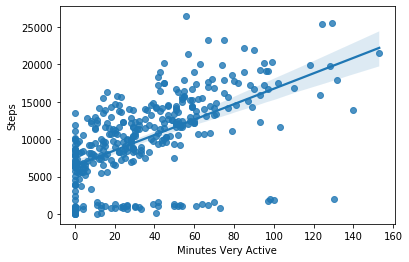

In [85]:
import seaborn as sns
sns.regplot(x="Minutes Very Active", y = "Steps", data = fitbit)


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

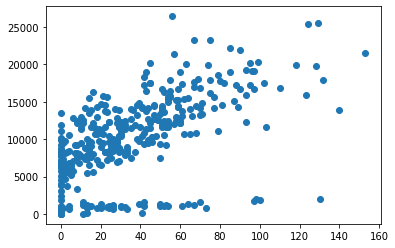

In [86]:
import matplotlib.pyplot as plt
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# There is some correlation but I don't think it's safe to say it correlates
# totatlly. I don't know how to interpret the points on the left hand side of 
# of the plot.


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [94]:
from scipy import stats
X = fitbit['Minutes Sedentary']
Y = fitbit['Steps']
slope, intercept, r_value, _, std_err = stats.linregress(X, Y)  
slope

1.4595893198804288

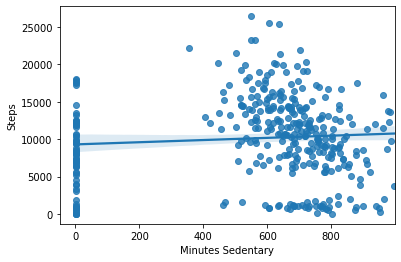

In [95]:
# visualizing linear relationship
sns.regplot(x="Minutes Sedentary", y = "Steps", data = fitbit)

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

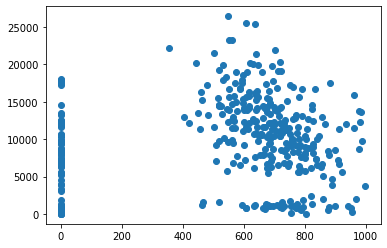

In [96]:
plt.scatter(x=fitbit["Minutes Sedentary"], y=fitbit['Steps'])


In [ ]:
# The relationship is not linear??

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [100]:
X = fitbit['MinutesOfSleep']
Y = fitbit['Steps']
slope, intercept, r_value, _, std_err = stats.linregress(X, Y)  
slope

# I'm not sure I know how to interpret this

4.735588289963671

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

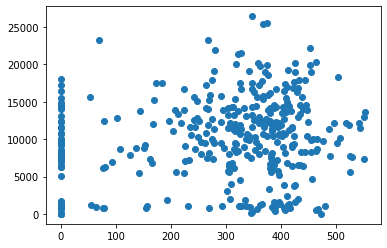

In [101]:
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [107]:
cor_fit = fitbit.corr()

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [109]:
cor_fit["Steps"].sort_values()

# Distance is a highly correlated with the number of steps

Activity Calories        -0.160568
Minutes Sedentary         0.076906
NumberOfAwakings          0.106591
MinutesOfBeingAwake       0.124846
MinutesOfSleep            0.130986
LengthOfRestInMinutes     0.133405
Calorie burned            0.255305
Minutes Fairly Active     0.303244
Floors                    0.306511
Minutes Lightly Active    0.393010
Minutes Very Active       0.571452
Distance                  0.779678
Steps                     1.000000
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [110]:
time_grades = pd.read_csv("/Users/ana/ironhack_coding/Module 2/Week 4/lab-pivot-table-and-correlation/your_code/data/Time_Grades.csv")

#### Show visually the frequency distribution of the time_grades dataset.

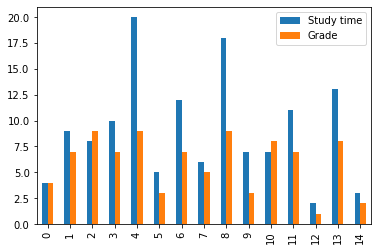

In [123]:
time_grades.plot.bar()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [124]:
# pearson 
time_grades.corr(method="pearson")

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [125]:
# spearman
time_grades.corr(method="spearman")

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

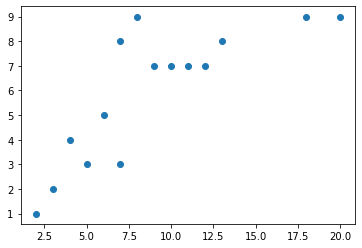

In [126]:
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
#From what I read it seems to make more sense to user Spearman here, because
#the variables are ordinal ?? But I'm still not sure aobut the difference
